IMPORTING THE DEPENDENCIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import  train_test_split

DATA COLLECTION AND PREPROCESSING

In [2]:
dataset = sklearn.datasets.load_breast_cancer() # to check whether the patient is malignant or benign 
dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
breast_cancer_dataset = pd.DataFrame(dataset.data,columns=dataset.feature_names)
breast_cancer_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
breast_cancer_dataset['label'] = dataset.target
breast_cancer_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [16]:
# breast_cancer_dataset.shape
# breast_cancer_dataset.info()
# breast_cancer_dataset.describe()
# breast_cancer_dataset.isnull().sum()


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [5]:
breast_cancer_dataset['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

1 - BENIGN
0 - MALIGNANT

In [6]:
breast_cancer_dataset.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


SEPARATING FEATURES AND TARGET

In [7]:
x = breast_cancer_dataset.drop('label', axis=1)
y = breast_cancer_dataset['label']

In [8]:
print(x)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [9]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int32


SPLITING DATA INTO TRAIN AND TEST DATA

In [10]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [11]:
print(x.shape,x_train.shape,x_test.shape)

(569, 30) (455, 30) (114, 30)


STANDARDIZE DATA

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

BUILDING NEURAL NETWORK

In [13]:
#importing tensorflow and keras

import tensorflow as tf
tf.random.set_seed(3) #since we are initializing so many values and weights , each time we execute the neural netwrok the output will be different
#so inroder to rectify that and for constant value of accuracy each time , we set random.set_seed()
from tensorflow import keras

In [14]:
x_train_std

array([[-0.01330339,  1.7757658 , -0.01491962, ..., -0.13236958,
        -1.08014517, -0.03527943],
       [-0.8448276 , -0.6284278 , -0.87702746, ..., -1.11552632,
        -0.85773964, -0.72098905],
       [ 1.44755936,  0.71180168,  1.47428816, ...,  0.87583964,
         0.4967602 ,  0.46321706],
       ...,
       [-0.46608541, -1.49375484, -0.53234924, ..., -1.32388956,
        -1.02997851, -0.75145272],
       [-0.50025764, -1.62161319, -0.527814  , ..., -0.0987626 ,
         0.35796577, -0.43906159],
       [ 0.96060511,  1.21181916,  1.00427242, ...,  0.8956983 ,
        -1.23064515,  0.50697397]])

In [15]:
#setting up the layers of neural network 

#flatten() - we have to flatten the input features and pass them into different neurons, ie convert features into single dimensional array
#number of neurons in input layer is equal to number of features in the dataset
#number of neurons in output layer is equal to number of classes in target

model = keras.Sequential([
                            keras.layers.Flatten(input_shape = (30,)),
                            keras.layers.Dense(20,activation='relu'),
                            keras.layers.Dense(2,activation='sigmoid')
])

COMPILING THE NEURAL NETWORK

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Categorical Cross-Entropy:

Loss Function Name: categorical_crossentropy
Used for: Multiclass classification tasks where the model predicts the probability distribution over multiple classes (e.g., image classification with more than two classes).

Sparse Categorical Cross-Entropy:
Loss Function Name: sparse_categorical_crossentropy
Used for: Multiclass classification tasks similar to categorical cross-entropy but with integer-encoded class labels as targets (useful when class labels are not one-hot 

In [17]:
history = model.fit(x_train_std,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 20ms/step - loss: 0.7050 - accuracy: 0.6553 - val_loss: 0.4620 - val_accuracy: 0.8043
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 0.5183 - accuracy: 0.7702 - val_loss: 0.3519 - val_accuracy: 0.8913
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 0.3981 - accuracy: 0.8362 - val_loss: 0.2863 - val_accuracy: 0.9348
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 0.3228 - accuracy: 0.8631 - val_loss: 0.2445 - val_accuracy: 0.9348
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 0.2665 - accuracy: 0.8900 - val_loss: 0.2145 - val_accuracy: 0.9565
Epoch 6/10
13/13 [==============================] - 0s 5ms/step - loss: 0.2256 - accuracy: 0.9095 - val_loss: 0.1919 - val_accuracy: 0.9565
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1949 - accuracy: 0.9364 - val_loss: 0.1734 - val_accuracy: 0.9565
Epoch 8/10
13/13 [=

VISUALIZING ACCURACY AND LOSS

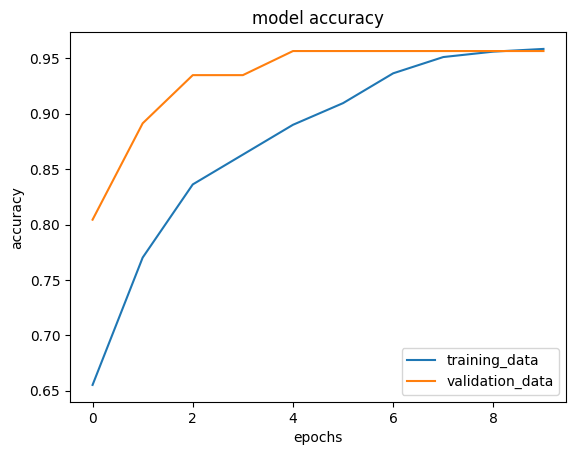

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['training_data','validation_data'],loc='lower right')
plt.show()

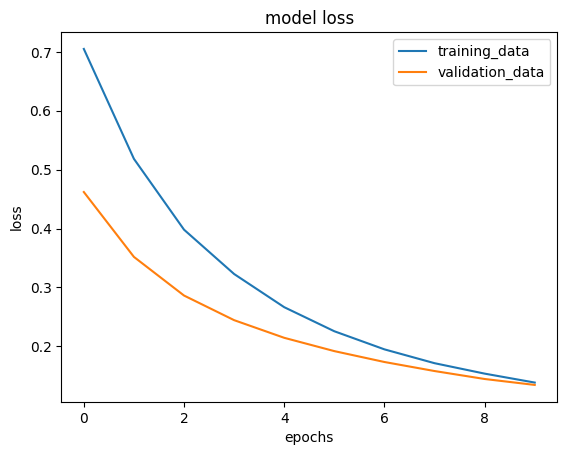

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['training_data','validation_data'],loc='upper right')
plt.show()

ACCURACY OF MODEL ON TEST DATA

In [20]:
loss , accuracy = model.evaluate(x_test_std,y_test)
print(accuracy)

4/4 [==============================] - 0s 3ms/step - loss: 0.1428 - accuracy: 0.9474
0.9473684430122375


In [21]:
print(x_test_std.shape)
print(x_test_std[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [23]:
y_pred = model.predict(x_test_std)
print(y_pred.shape)
print(y_pred[0])

#the output represents , first value is the probability that the label is 0 and second value is the probability that the label is 1

4/4 [==============================] - 0s 2ms/step
(114, 2)
[0.6039173  0.54480153]


In [24]:
print(x_test_std)

[[-0.04462793 -1.41612656 -0.05903514 ... -0.18278004 -1.23064515
  -0.6268286 ]
 [ 0.24583601 -0.06219797  0.21802678 ...  0.54129749  0.11047691
   0.0483572 ]
 [-1.26115925 -0.29051645 -1.26499659 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [ 0.72709489  0.45836817  0.75277276 ...  1.46701686  1.19909344
   0.65319961]
 [ 0.25437907  1.33054477  0.15659489 ... -1.29043534 -2.22561725
  -1.59557344]
 [ 0.84100232 -0.06676434  0.8929529  ...  2.15137705  0.35629355
   0.37459546]]


In [25]:
print(y_pred)

[[0.6039173  0.54480153]
 [0.53651184 0.543933  ]
 [0.06342088 0.9278718 ]
 [0.99993026 0.58037555]
 [0.49298686 0.68200755]
 [0.9966596  0.4912795 ]
 [0.33137336 0.64294654]
 [0.0652009  0.8960119 ]
 [0.14913622 0.80737925]
 [0.10935755 0.78905934]
 [0.48190054 0.589332  ]
 [0.21602169 0.8709598 ]
 [0.38540247 0.6465855 ]
 [0.3833002  0.6472164 ]
 [0.11053506 0.84747416]
 [0.97378516 0.4462088 ]
 [0.07383747 0.9070326 ]
 [0.16525295 0.7780453 ]
 [0.13510443 0.784864  ]
 [0.98237604 0.35594323]
 [0.34487048 0.58666575]
 [0.08484236 0.8811161 ]
 [0.06643403 0.81452113]
 [0.04794072 0.92107135]
 [0.22857946 0.7239631 ]
 [0.9811301  0.54088414]
 [0.21327211 0.7787127 ]
 [0.36506096 0.67661095]
 [0.9763993  0.4796068 ]
 [0.9776321  0.47057742]
 [0.18726517 0.801613  ]
 [0.1734304  0.7876709 ]
 [0.1327508  0.81055135]
 [0.99925894 0.24704812]
 [0.9721541  0.5762112 ]
 [0.23503898 0.62523454]
 [0.04077413 0.89232993]
 [0.22780183 0.75719434]
 [0.06158165 0.9183121 ]
 [0.19061416 0.8450344 ]


model.predict() gives the prediction probability for the data point 

In [28]:
#argmax() function

my_list = [0.56,0.25]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[0.56, 0.25]
0


In [30]:
#converting prediction probability into class labels , ie 0 or 1

y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


BUILDING THE PREDICTIVE SYSTEM 

In [33]:
input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

#change the input data to numpy array 
input_data_numpy = np.asarray(input_data)

#reshape the numpy array as we are predicting for one data point 
input_data_reshape = input_data_numpy.reshape(1,-1)

#standardizing the input_data
input_data_std = scaler.transform(input_data_reshape)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
    print("Tumor is malignant")
else:
    print("Tumor is benign")

1/1 [==============================] - 0s 36ms/step
[[0.08691666 0.88814723]]
[1]
Tumor is benign


C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
